How are in demand skills trending for Data Analysts?

Methodology:

1. Aggregate skill counts monthly
2. Reanalyze based on percentage of total Jobs
3. Plot the monthly skill demand 

In [2]:
# Importing Libraries
import ast
import pandas as pd 
from datasets import load_dataset
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the Dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

# Data Cleanup
def clean_list(skill_list):
    if pd.notna(skill_list):
        return ast.literal_eval(skill_list)
    else:
        return
    
df['job_skills'] = df['job_skills'].apply(clean_list)

In [25]:
df_DA_IND = df[(df['job_country'] == 'India') & (df['job_title_short'] == 'Data Analyst')].copy()
df_DA_IND['job_posted_month_no'] = df_DA_IND['job_posted_date'].dt.month

In [26]:
df_DA_IND_explode = df_DA_IND.explode('job_skills').copy()

In [27]:
df_DA_IND_pivot = df_DA_IND_explode.pivot_table(index='job_posted_month_no',columns='job_skills',aggfunc='size',fill_value=0)
df_DA_IND_pivot.loc['total'] =df_DA_IND_pivot.sum()
df_DA_IND_pivot = df_DA_IND_pivot[df_DA_IND_pivot.loc['total'].sort_values(ascending=False).index]

In [28]:
df_DA_IND_pivot = df_DA_IND_pivot.iloc[:,0:5].drop('total')
df_DA_IND_pivot


job_skills,sql,python,excel,tableau,power bi
job_posted_month_no,,,,,
1,305,216,218,159,98
2,209,148,156,116,75
3,229,151,138,125,76
4,204,143,138,98,83
5,155,101,106,71,61
6,193,150,115,114,77
7,245,161,174,124,93
8,317,216,192,152,127
9,341,229,228,195,168


In [29]:
# Getting the values in percentage
DA_total_monthly_jobs = df_DA_IND.groupby('job_posted_month_no').size()
DA_total_monthly_jobs

job_posted_month_no
1     628
2     433
3     422
4     418
5     278
6     367
7     457
8     618
9     630
10    500
11    722
12    648
dtype: int64

In [61]:
df_DA_IND_percent = df_DA_IND_pivot.div(DA_total_monthly_jobs/100,axis = 0)
df_DA_IND_percent

job_skills,sql,python,excel,tableau,power bi
job_posted_month_no,,,,,
1,48.566879,34.394904,34.713376,25.318471,15.605096
2,48.267898,34.180139,36.027714,26.789838,17.321016
3,54.265403,35.781991,32.701422,29.620853,18.009479
4,48.803828,34.210526,33.014354,23.444976,19.856459
5,55.755396,36.330935,38.129496,25.539568,21.942446
6,52.588556,40.871935,31.335150,31.062670,20.980926
7,53.610503,35.229759,38.074398,27.133479,20.350109
8,51.294498,34.951456,31.067961,24.595469,20.550162
9,54.126984,36.349206,36.190476,30.952381,26.666667


In [62]:
# Converting job_posted_month_no values to string values
df_DA_IND_percent = df_DA_IND_percent.reset_index()
df_DA_IND_percent['job_posted_month'] = df_DA_IND_percent['job_posted_month_no'].apply(lambda x:pd.to_datetime(x,format='%m').strftime('%b'))
df_DA_IND_percent = df_DA_IND_percent.set_index('job_posted_month')
df_DA_IND_percent = df_DA_IND_percent.drop(columns = 'job_posted_month_no')

In [63]:
df_plot =df_DA_IND_percent

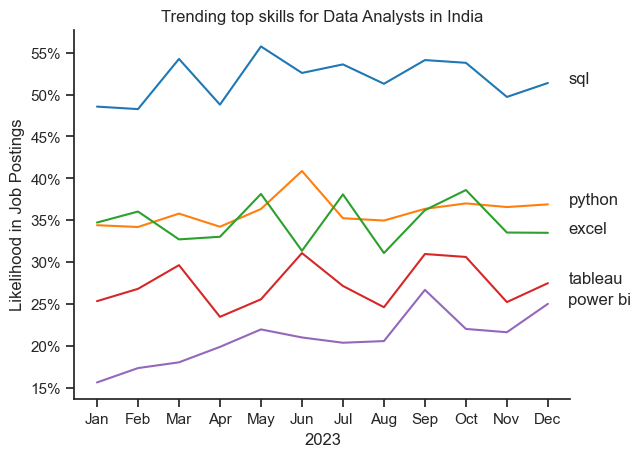

In [68]:
sns.lineplot(data=df_plot,dashes=False,palette='tab10')
sns.set_theme(style='ticks')
sns.despine()
plt.title('Trending top skills for Data Analysts in India')
plt.ylabel('Likelihood in Job Postings')
plt.xlabel('2023')
plt.legend().remove()
from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))
for i in range(5):
    plt.text(11.5,df_plot.iloc[-1,i],df_plot.columns[i])